**Name: Muhan Li**

**USC ID: 5104027574**

# Time Series Classification_EE559 Homework 3,4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.linear_model.logistic import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import RFECV, f_regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler

## (a) Download the dataset

In [2]:
bending1_1 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/bending1/dataset1.csv', 
                         skiprows=5, header=None)
bending1_2 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/bending1/dataset2.csv', 
                         skiprows=5, header=None)
bending1_3 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/bending1/dataset3.csv', 
                         skiprows=5, header=None)
bending1_4 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/bending1/dataset4.csv', 
                         skiprows=5, header=None)
bending1_5 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/bending1/dataset5.csv', 
                         skiprows=5, header=None)
bending1_6 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/bending1/dataset6.csv', 
                         skiprows=5, header=None)
bending1_7 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/bending1/dataset7.csv', 
                         skiprows=5, header=None)
bending1 = pd.concat([bending1_1, bending1_2, bending1_3, bending1_4, 
                      bending1_5, bending1_6, bending1_7], axis=1)

In [3]:
bending2_1 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/bending2/dataset1.csv', 
                         skiprows=5, header=None)
bending2_2 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/bending2/dataset2.csv', 
                         skiprows=5, header=None)
bending2_3 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/bending2/dataset3.csv', 
                         skiprows=5, header=None)
bending2_4 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/bending2/dataset4.csv', 
                         skiprows=5, header=None, sep='\s+')
bending2_5 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/bending2/dataset5.csv', 
                         skiprows=5, header=None)
bending2_6 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/bending2/dataset6.csv', 
                         skiprows=5, header=None)
bending2 = pd.concat([bending2_1, bending2_2, bending2_3, bending2_4, 
                      bending2_5, bending2_6], axis=1)

In [4]:
cycling_1 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset1.csv', 
                        skiprows=5, header=None)
cycling_2 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset2.csv', 
                        skiprows=5, header=None)
cycling_3 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset3.csv', 
                        skiprows=5, header=None)
cycling_4 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset4.csv', 
                        skiprows=5, header=None)
cycling_5 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset5.csv', 
                        skiprows=5, header=None)
cycling_6 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset6.csv', 
                        skiprows=5, header=None)
cycling_7 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset7.csv', 
                        skiprows=5, header=None)
cycling_8 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset8.csv', 
                        skiprows=5, header=None)
cycling_9 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset9.csv', 
                        skiprows=5, header=None)
cycling_10 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset10.csv', 
                         skiprows=5, header=None)
cycling_11 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset11.csv', 
                         skiprows=5, header=None)
cycling_12 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset12.csv', 
                         skiprows=5, header=None)
cycling_13 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset13.csv', 
                         skiprows=5, header=None)
cycling_14 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset14.csv', 
                         skiprows=5, header=None)
cycling_15 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/cycling/dataset15.csv', 
                         skiprows=5, header=None)
cycling = pd.concat([cycling_1, cycling_2, cycling_3, cycling_4, 
                     cycling_5, cycling_6, cycling_7, cycling_8, 
                     cycling_9, cycling_10, cycling_11, cycling_12, 
                     cycling_13, cycling_14, cycling_15], axis=1)

In [5]:
lying_1 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset1.csv', 
                      skiprows=5, header=None)
lying_2 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset2.csv', 
                      skiprows=5, header=None)
lying_3 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset3.csv', 
                      skiprows=5, header=None)
lying_4 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset4.csv', 
                      skiprows=5, header=None)
lying_5 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset5.csv', 
                      skiprows=5, header=None)
lying_6 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset6.csv', 
                      skiprows=5, header=None)
lying_7 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset7.csv', 
                      skiprows=5, header=None)
lying_8 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset8.csv', 
                      skiprows=5, header=None)
lying_9 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset9.csv', 
                      skiprows=5, header=None)
lying_10 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset10.csv', 
                       skiprows=5, header=None)
lying_11 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset11.csv', 
                       skiprows=5, header=None)
lying_12 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset12.csv', 
                       skiprows=5, header=None)
lying_13 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset13.csv', 
                       skiprows=5, header=None)
lying_14 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset14.csv', 
                       skiprows=5, header=None)
lying_15 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/lying/dataset15.csv', 
                       skiprows=5, header=None)
lying = pd.concat([lying_1, lying_2, lying_3, lying_4, 
                   lying_5, lying_6, lying_7, lying_8, 
                   lying_9, lying_10,lying_11, lying_12, 
                   lying_13, lying_14, lying_15], axis=1)

In [6]:
sitting_1 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset1.csv', 
                        skiprows=5, header=None)
sitting_2 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset2.csv', 
                        skiprows=5, header=None)
sitting_3 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset3.csv', 
                        skiprows=5, header=None)
sitting_4 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset4.csv', 
                        skiprows=5, header=None)
sitting_5 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset5.csv', 
                        skiprows=5, header=None)
sitting_6 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset6.csv', 
                        skiprows=5, header=None)
sitting_7 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset7.csv', 
                        skiprows=5, header=None)
sitting_8 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset8.csv', 
                        skiprows=5, header=None)
sitting_9 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset9.csv', 
                        skiprows=5, header=None)
sitting_10 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset10.csv', 
                         skiprows=5, header=None)
sitting_11 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset11.csv', 
                         skiprows=5, header=None)
sitting_12 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset12.csv', 
                         skiprows=5, header=None)
sitting_13 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset13.csv', 
                         skiprows=5, header=None)
sitting_14 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset14.csv', 
                         skiprows=5, header=None)
sitting_15 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/sitting/dataset15.csv', 
                         skiprows=5, header=None)
sitting = pd.concat([sitting_1, sitting_2, sitting_3, sitting_4, sitting_5,
                     sitting_6, sitting_7, sitting_8, sitting_9, sitting_10,
                     sitting_11, sitting_12, sitting_13, sitting_14, sitting_15],
                     axis=1)

In [7]:
standing_1 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset1.csv', 
                         skiprows=5, header=None)
standing_2 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset2.csv', 
                         skiprows=5, header=None)
standing_3 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset3.csv', 
                         skiprows=5, header=None)
standing_4 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset4.csv', 
                         skiprows=5, header=None)
standing_5 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset5.csv', 
                         skiprows=5, header=None)
standing_6 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset6.csv', 
                         skiprows=5, header=None)
standing_7 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset7.csv', 
                         skiprows=5, header=None)
standing_8 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset8.csv', 
                         skiprows=5, header=None)
standing_9 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset9.csv', 
                         skiprows=5, header=None)
standing_10 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset10.csv', 
                          skiprows=5, header=None)
standing_11 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset11.csv', 
                          skiprows=5, header=None)
standing_12 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset12.csv', 
                          skiprows=5, header=None)
standing_13 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset13.csv', 
                          skiprows=5, header=None)
standing_14 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset14.csv', 
                          skiprows=5, header=None)
standing_15 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/standing/dataset15.csv', 
                          skiprows=5, header=None)
standing = pd.concat([standing_1, standing_2, standing_3, standing_4, 
                      standing_5, standing_6, standing_7, standing_8, 
                      standing_9, standing_10, standing_11, standing_12, 
                      standing_13, standing_14, standing_15], axis=1)

In [8]:
walking_1 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset1.csv', 
                        skiprows=5, header=None)
walking_2 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset2.csv', 
                        skiprows=5, header=None)
walking_3 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset3.csv', 
                        skiprows=5, header=None)
walking_4 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset4.csv', 
                        skiprows=5, header=None)
walking_5 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset5.csv', 
                        skiprows=5, header=None)
walking_6 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset6.csv', 
                        skiprows=5, header=None)
walking_7 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset7.csv', 
                        skiprows=5, header=None)
walking_8 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset8.csv', 
                        skiprows=5, header=None)
walking_9 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset9.csv', 
                        skiprows=5, header=None)
walking_10 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset10.csv', 
                         skiprows=5, header=None)
walking_11 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset11.csv', 
                         skiprows=5, header=None)
walking_12 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset12.csv', 
                         skiprows=5, header=None)
walking_13 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset13.csv', 
                         skiprows=5, header=None)
walking_14 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset14.csv', 
                         skiprows=5, header=None)
walking_15 = pd.read_csv('/Users/vitalee/EE559_HW34/AReM/walking/dataset15.csv', 
                         skiprows=5, header=None)
walking = pd.concat([walking_1, walking_2, walking_3, walking_4, 
                     walking_5,walking_6, walking_7, walking_8, 
                     walking_9, walking_10, walking_11, walking_12, 
                     walking_13, walking_14, walking_15], axis=1)

## (b) Pre-Processing (generate the test and train dataset)

In [9]:
df = pd.concat([bending1, bending2, cycling, lying, sitting, standing, walking],
               axis=1)
test = pd.concat([bending1.iloc[:, range(0,14)], bending2.iloc[:, range(0,14)], 
                  cycling.iloc[:, range(0,21)], lying.iloc[:, range(0,21)], 
                  sitting.iloc[:, range(0,21)], standing.iloc[:, range(0,21)],
                  walking.iloc[:, range(0,21)]], axis=1)
train = pd.concat([bending1.iloc[:, range(14,49)], bending2.iloc[:, range(14,42)], 
                   cycling.iloc[:, range(21,105)], lying.iloc[:, range(21,105)], 
                   sitting.iloc[:, range(21,105)], standing.iloc[:, range(21,105)],
                   walking.iloc[:, range(21,105)]], axis=1)

## (c) Feature Extraction (focus on time-domain features)

### i. Types of time-domain features that are usually used in time series classification:
**minimum, maximum, mean, median, standard deviation, first quartile, and third quartile.**

### ii. Extract the time-domain features

In [10]:
def f_dataset(n, df):
    features = pd.DataFrame(columns=['min1','max1','mean1','med1',
                                     'std1','first_q1','third_q1',
                                     'min2','max2','mean2','med2',
                                     'std2','first_q2','third_q2',
                                     'min3','max3','mean3','med3',
                                     'std3','first_q3','third_q3',
                                     'min4','max4','mean4','med4',
                                     'std4','first_q4','third_q4',
                                     'min5','max5','mean5','med5',
                                     'std5','first_q5','third_q5',
                                     'min6','max6','mean6','med6',
                                     'std6','first_q6','third_q6'])
    for j in range(1,7):
        min_i = []
        for i in range(j,(n*7),7):
            min_i.append(min(df.iloc[:,i]))
        k = (j*7)-7
        features.iloc[:,k] = np.transpose(min_i)

    for j in range(1,7):
        max_i = []
        for i in range(j,(n*7),7):
            max_i.append(max(df.iloc[:,i]))
        k = (j*7)-6
        features.iloc[:,k] = np.transpose(max_i)

    for j in range(1,7):
        mean_i = []
        for i in range(j,(n*7),7):
            mean_i.append(np.mean(df.iloc[:,i]))
        k = (j*7)-5
        features.iloc[:,k] = np.transpose(mean_i)

    for j in range(1,7):
        med_i = []
        for i in range(j,(n*7),7):
            med_i.append(df.iloc[:,i].median())
        k = (j*7)-4
        features.iloc[:,k] = np.transpose(med_i)

    for j in range(1,7):
        std_i = []
        for i in range(j,(n*7),7):
            std_i.append(np.std(df.iloc[:,i]))
        k = (j*7)-3
        features.iloc[:,k] = np.transpose(std_i)

    for j in range(1,7):
        first_q_i = []
        for i in range(j,(n*7),7):
            first_q_i.append(df.iloc[:,i].quantile(0.25))
        k = (j*7)-2
        features.iloc[:,k] = np.transpose(first_q_i)

    for j in range(1,7):
        third_q_i = []
        for i in range(j,(n*7),7):
            third_q_i.append(df.iloc[:,i].quantile(0.75))
        k = (j*7)-1
        features.iloc[:,k] = np.transpose(third_q_i)
    
    return features

In [11]:
f_df = f_dataset(88, df)
f_train = f_dataset(69, train)
f_test = f_dataset(19, test)

**Normalize features:**

In [12]:
normalization = preprocessing.MinMaxScaler()
f_df = pd.DataFrame(normalization.fit_transform(f_df))
f_train = pd.DataFrame(normalization.fit_transform(f_train))
f_test = pd.DataFrame(normalization.fit_transform(f_test))

### iii. Select the three most important time-domain features:
**mean, median, and standard deviation.**

## (d) Binary Classification Using Logistic Regression

### i. Plot the scatter matrix

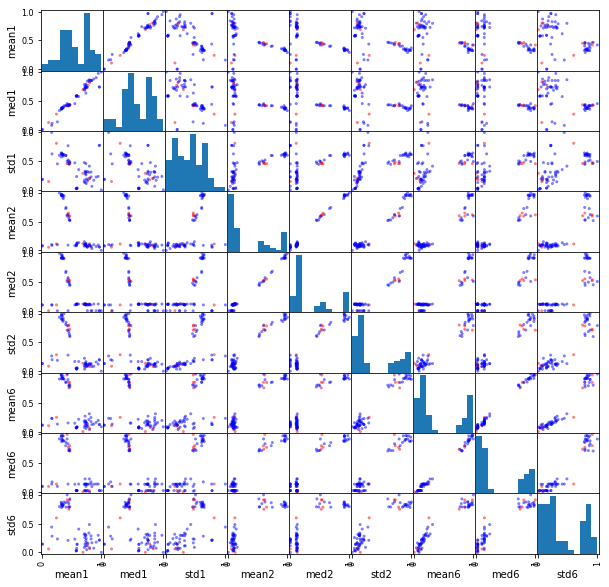

In [93]:
f_train.columns = ['min1','max1','mean1','med1','std1','first_q1','third_q1',
                   'min2','max2','mean2','med2','std2','first_q2','third_q2',
                   'min3','max3','mean3','med3','std3','first_q3','third_q3',
                   'min4','max4','mean4','med4','std4','first_q4','third_q4',
                   'min5','max5','mean5','med5','std5','first_q5','third_q5',
                   'min6','max6','mean6','med6','std6','first_q6','third_q6']
f_di = f_train.iloc[:,[2,3,4,9,10,11,37,38,39]]
color = []
for i in f_di.index:
    if (i>1 and i<7) or (i>8 and i<13):
        color.append('r')
    else:
        color.append('b')
scatter_matrix(f_di.iloc[:,range(0,9)], figsize=(10,10), marker='.',c=color)
plt.show()

### ii. Break each time series into two and plot the scatter matrix

In [14]:
train1 = train.iloc[0:240]
train2 = train.iloc[240:480]
train2 = train2.reset_index(drop=True)
train_break = pd.concat([train1, train2], axis=1)

In [15]:
f_break = pd.DataFrame(columns=['instance','mean1','med1','std1',
                                'mean2','med2','std2',
                                'mean6','med6','std6'])
f_break.iloc[:,0] = np.transpose(range(1,139))

for j in range(1,4):
    mean_i = []
    for i in range(j,966,7):
        mean_i.append(np.mean(train_break.iloc[:,i]))
    k = (j*3)-2
    f_break.iloc[:,k] = np.transpose(mean_i)
    
for j in range(1,4):
    med_i = []
    for i in range(j,966,7):
        med_i.append(train_break.iloc[:,i].median())
    k = (j*3)-1
    f_break.iloc[:,k] = np.transpose(med_i)
    
for j in range(1,4):
    std_i = []
    for i in range(j,966,7):
        std_i.append(np.std(train_break.iloc[:,i]))
    k = (j*3)
    f_break.iloc[:,k] = np.transpose(std_i)

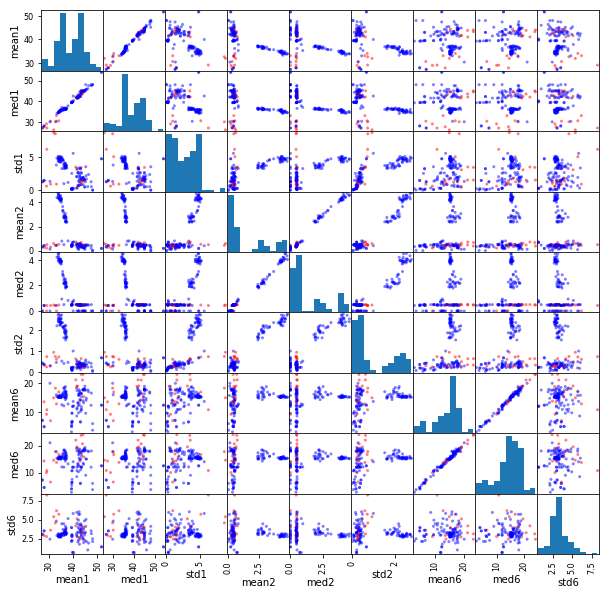

In [16]:
color = []
for i in f_break['instance']:
    if (i>0 and i<10) or (i>69 and i<79):
        color.append('r')
    else:
        color.append('b')
scatter_matrix(f_break.iloc[:,range(1,10)], figsize=(10,10), marker='.',
              c=color)
plt.show()

### iii. Break each time series into 1-20 time series and find the best $l$ using cross-validation

In [17]:
def breakdf(l, df):
    if 480%l == 0:
        df_l = df.iloc[0:(480//l)]
        for i in range(2,l+1):
            df_i = df.iloc[((i-1)*(480//l)):(i*(480//l))]
            df_i = df_i.reset_index(drop=True)
            df_l = pd.concat([df_l, df_i], axis=1)
    else:
        df_l = df.iloc[0:((480//l)+1)]
        for i in range(2,l+1):
            if i<((480%l)+1):
                df_i = df.iloc[((i-1)*(480//l+1)):(i*(480//l+1))]
                df_i = df_i.reset_index(drop=True)
                df_l = pd.concat([df_l, df_i], axis=1)
            else:
                df_i = df.iloc[((i-1)*(480//l)+(480%l)):(i*(480//l)+(480%l))]
                df_i = df_i.reset_index(drop=True)
                df_l = pd.concat([df_l, df_i], axis=1)
    return df_l

In [18]:
for l in range(1,21):
    train_l = breakdf(l, train)
    test_l = breakdf(l, test)
    f_train_l = f_dataset(69*l, train_l)
    f_test_l = f_dataset(19*l, test_l)
    
    normalization = preprocessing.MinMaxScaler()
    f_train_l = pd.DataFrame(normalization.fit_transform(f_train_l))
    f_test_l = pd.DataFrame(normalization.fit_transform(f_test_l))

    classifier = LogisticRegression(C=100000)
    X_train = f_train_l
    y_train = []
    for i in f_train_l.index:
        if (i%69)>=0 and (i%69)<9:
            y_train.append(1)
        else:
            y_train.append(0)

    selector = RFECV(classifier, cv=5)
    selector = selector.fit(X_train, y_train)
    print('When l =', l)
    print('the score is', selector.grid_scores_.max())

When l = 1
the score is 0.9714285714285715
When l = 2
the score is 0.9486772486772488
When l = 3
the score is 0.9324041811846691
When l = 4
the score is 0.9490909090909092
When l = 5
the score is 0.9507246376811596
When l = 6
the score is 0.9420217455186599
When l = 7
the score is 0.9358032646048109
When l = 8
the score is 0.9383292383292383
When l = 9
the score is 0.9339096774193548
When l = 10
the score is 0.944927536231884
When l = 11
the score is 0.947289996514465
When l = 12
the score is 0.9432201533406352
When l = 13
the score is 0.9486778398510243
When l = 14
the score is 0.9326905614016345
When l = 15
the score is 0.9468599033816425
When l = 16
the score is 0.9429288358700123
When l = 17
the score is 0.9411602109474451
When l = 18
the score is 0.9404035496826013
When l = 19
the score is 0.9389545177488173
When l = 20
the score is 0.944927536231884


**Therefore, after cross-validation, the best value of $l$ is 1.**

### iv. Report confusion matrix, ROC, AUC, parameters of logistic regression $\beta$, and p-values.

#### Confusion matrix

In [19]:
f_train_l = f_dataset(69, train)
f_test_l = f_dataset(19, test)

normalization = preprocessing.MinMaxScaler()
f_train_l = pd.DataFrame(normalization.fit_transform(f_train_l))
f_test_l = pd.DataFrame(normalization.fit_transform(f_test_l))

classifier = LogisticRegression(C=100000)
X_train = f_train_l
y_train = []
for i in f_train_l.index:
    if (i%69)>=0 and (i%69)<9:
        y_train.append(1)
    else:
        y_train.append(0)
X_test = f_test_l
y_test = []
for i in f_test_l.index:
    if (i%19)>=0 and (i%19)<4:
        y_test.append(1)
    else:
        y_test.append(0)

selector = RFECV(classifier, cv=5)
selector = selector.fit(X_train, y_train)
y_pred = selector.predict(X_train)
C = confusion_matrix(y_train, y_pred)
print('Confusion matrix is\n',C)

Confusion matrix is
 [[60  0]
 [ 0  9]]


#### ROC and AUC

ROC:



<Figure size 432x288 with 0 Axes>

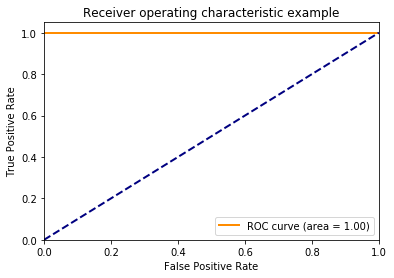

AUC = 1.0


In [20]:
fpr,tpr,threshold = roc_curve(y_train, y_pred)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
print('ROC:\n')
plt.show()
print('AUC =',roc_auc)

#### Parameters of logistic regression $\beta_i$ (beta)

In [21]:
print('beta:\n', selector.estimator_.coef_)
print('beta[0]:\n', selector.estimator_.intercept_)

beta:
 [[-29.13951796 -11.58000381  20.06323006  42.1812897   19.09552138
   14.7553896  -15.72849619]]
beta[0]:
 [-21.87811906]


#### p-values

In [22]:
f_test = f_regression(X_train, y_train)
print('p-values:\n', f_test[1])

p-values:
 [9.48732900e-01 7.43999955e-01 4.13495747e-01 4.51378024e-01
 4.92256071e-01 3.88448867e-01 2.60633322e-01            nan
 1.13928534e-01 3.28930544e-02 3.91297566e-02 6.03895456e-02
 2.01803690e-02 3.15857779e-02 9.10635221e-01 1.66528800e-03
 7.13209626e-02 6.62137873e-02 3.69358003e-03 2.09818669e-01
 2.47048358e-02            nan 9.00704584e-01 4.18377695e-02
 2.36467345e-02 1.89136172e-01 3.67233570e-02 4.69618272e-02
 1.63037940e-07 3.38011690e-14 7.08216691e-09 8.46935824e-08
 3.87386040e-01 1.50643997e-07 2.30944566e-08 7.01556658e-01
 7.18691690e-02 1.34860818e-02 1.23005135e-02 2.83606140e-02
 4.84083777e-03 1.47419489e-02]


/anaconda3/envs/mypython/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/envs/mypython/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/envs/mypython/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/envs/mypython/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


### v. Test the classifier on the test set

In [23]:
print('The accuracy on the test set:\n', selector.score(X_test, y_test))

The accuracy on the test set:
 1.0


### vi. Well-separated? Yes, according to my data structure.

### vii. Case-control sampling

#### Using Down-sampling and find best $l$ using cross-validation

In [28]:
for l in range(1,21):
    train_l = breakdf(l, train)
    test_l = breakdf(l, test)
    f_train_l = f_dataset(69*l, train_l)
    f_test_l = f_dataset(19*l, test_l)
    
    normalization = preprocessing.MinMaxScaler()
    f_train_l = pd.DataFrame(normalization.fit_transform(f_train_l))
    f_test_l = pd.DataFrame(normalization.fit_transform(f_test_l))

    classifier = LogisticRegression(C=100000)
    X_train = f_train_l
    y_train = []
    for i in f_train_l.index:
        if (i%69)>=0 and (i%69)<9:
            y_train.append(1)
        else:
            y_train.append(0)
            
    r = {
        1: 9*l,
        0: 18*l
    }
    rus = RandomUnderSampler(ratio=r)
    X_res, y_res = rus.fit_sample(X_train, y_train)
    selector = RFECV(classifier, cv=5)
    selector = selector.fit(X_res, y_res)
    print('When l =', l)
    print('the score is', selector.grid_scores_.max())

When l = 1
the score is 1.0
When l = 2
the score is 0.9633333333333333
When l = 3
the score is 0.9147058823529411
When l = 4
the score is 0.8969320534537925
When l = 5
the score is 0.9037037037037038
When l = 6
the score is 0.8772605083088955
When l = 7
the score is 0.8775030090819564
When l = 8
the score is 0.9077016007248565
When l = 9
the score is 0.9174251700680273
When l = 10
the score is 0.9074074074074072
When l = 11
the score is 0.89937463471654
When l = 12
the score is 0.916625874125874
When l = 13
the score is 0.9116227801592162
When l = 14
the score is 0.909820915926179
When l = 15
the score is 0.9234567901234566
When l = 16
the score is 0.9238693649071497
When l = 17
the score is 0.9238845306166485
When l = 18
the score is 0.9299985973770951
When l = 19
the score is 0.9042623995079735
When l = 20
the score is 0.9277777777777778


**Therefore, after cross-validation, the best value of $l$ is 1.**

#### Adjust the parameter and fit the model

In [72]:
f_train_l = f_dataset(69, train)
f_test_l = f_dataset(19, test)

normalization = preprocessing.MinMaxScaler()
f_train_l = pd.DataFrame(normalization.fit_transform(f_train_l))
f_test_l = pd.DataFrame(normalization.fit_transform(f_test_l))

classifier = LogisticRegression(C=100000)
X_train = f_train_l
y_train = []
for i in f_train_l.index:
    if (i%69)>=0 and (i%69)<9:
        y_train.append(1)
    else:
        y_train.append(0)

r = {
        1: 9,
        0: 18
    }
rus = RandomUnderSampler(ratio=r)
X_res, y_res = rus.fit_sample(X_train, y_train)
selector = RFECV(classifier, cv=5)
selector = selector.fit(X_res, y_res)
beta = selector.estimator_.coef_
beta_0 = selector.estimator_.intercept_
print('beta:\n', beta)
print('beta[0]:\n', beta_0)

beta:
 [[-10.94915893  -8.25605964  11.41941476 -13.30684329 -14.32083983
   11.91220394  26.14351743   8.47898412   7.37868958  -9.89381356]]
beta[0]:
 [-5.6014934]


**With case-control samples, we can estimate the regression parameters $\beta_j$ accurately; the constant term $\beta_0$ is incorrect.**

**Now, $\beta_0 = -5.6014934$. We correct the estimated intercept by a simple transformation:**
$$\beta_0^* = \beta_0 + log\frac{\pi}{1-\pi} - log\frac{\pi_0}{1-\pi_0}$$

In [95]:
pi = 9/69
pi_0 = 9/27
selector.estimator_.intercept_ = beta_0 + np.log(pi/(1-pi)) + np.log(pi_0/(1-pi_0))
print(selector.estimator_.intercept_)

[-8.19176057]


**So, the new $\beta_0^* = -8.19176057$. Then we fit the model using new parameter.**

#### Confusion matrix

In [87]:
y_pred = selector.predict(X_train)
C = confusion_matrix(y_train, y_pred)
print('Confusion matrix is\n',C)

Confusion matrix is
 [[59  1]
 [ 0  9]]


#### ROC and AUC

ROC:



<Figure size 432x288 with 0 Axes>

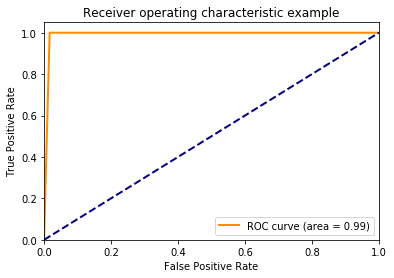

AUC = 0.9916666666666666


In [90]:
fpr,tpr,threshold = roc_curve(y_train, y_pred)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
print('ROC:\n')
plt.show()
print('AUC =',roc_auc)

## (e) Binary Classification Using $l_1$-penalized logistic regression

### i. Repeat 1(d)iii, find  the best value of $l$

In [32]:
for l in range(1,21):
    train_l = breakdf(l, train)
    test_l = breakdf(l, test)
    f_train_l = f_dataset(69*l, train_l)
    f_test_l = f_dataset(19*l, test_l)

    normalization = preprocessing.MinMaxScaler()
    f_train_l = pd.DataFrame(normalization.fit_transform(f_train_l))
    f_test_l = pd.DataFrame(normalization.fit_transform(f_test_l))

    X_train = f_train_l
    y_train = []
    for i in f_train_l.index:
        if (i%69)>=0 and (i%69)<9:
            y_train.append(1)
        else:
            y_train.append(0)
    X_test = f_test_l
    y_test = []
    for i in f_test_l.index:
        if (i%19)>=0 and (i%19)<4:
            y_test.append(1)
        else:
            y_test.append(0)

    classifier = LogisticRegressionCV(cv=5, penalty='l1', 
                                      solver='liblinear', n_jobs=2)
    classifier = classifier.fit(X_train, y_train)
    classifier.scores_
    scores = np.array(list(classifier.scores_.values()))
    scores = scores[0]
    means = []
    for i in range(0,10):
        means.append(np.mean(scores[:,i]))
    print('When l =', l)
    print('the score is', max(means))

When l = 1
the score is 0.9428571428571428
When l = 2
the score is 0.9486772486772488
When l = 3
the score is 0.9562137049941928
When l = 4
the score is 0.9419480519480519
When l = 5
the score is 0.9507246376811593
When l = 6
the score is 0.9540699382897444
When l = 7
the score is 0.9399484536082474
When l = 8
the score is 0.9456347256347255
When l = 9
the score is 0.9435870967741936
When l = 10
the score is 0.9434782608695652
When l = 11
the score is 0.9367636807249913
When l = 12
the score is 0.9432201533406352
When l = 13
the score is 0.9453258845437617
When l = 14
the score is 0.9388868116019443
When l = 15
the score is 0.9429951690821257
When l = 16
the score is 0.9438296997120525
When l = 17
the score is 0.9411674849972723
When l = 18
the score is 0.9436131623267263
When l = 19
the score is 0.9458189417467274
When l = 20
the score is 0.946376811594203


**Therefore, the best value of $l$ is 3.**

### ii. Compare the $l_1$-penalized with RFECV

**I think RFECV performs better. Because it obtained a best value of $l$ with a little bit higher score, also it is somewhat easier to implement.**

## (f) Multi-class Classification (The Realistic Case)

### i. Find the best $l$, report the test error, and research how confusion matrics and ROC are defined.

#### Find the best $l$

In [33]:
for l in range(1,21):
    train_l = breakdf(l, train)
    test_l = breakdf(l, test)
    f_train_l = f_dataset(69*l, train_l)
    f_test_l = f_dataset(19*l, test_l)

    normalization = preprocessing.MinMaxScaler()
    f_train_l = pd.DataFrame(normalization.fit_transform(f_train_l))
    f_test_l = pd.DataFrame(normalization.fit_transform(f_test_l))

    X_train = f_train_l
    y_train = []
    for i in f_train_l.index:
        if i%69 in range(0,5):
            y_train.append('bending1')
        elif i%69 in range(5,9):
            y_train.append('bending2')
        elif i%69 in range(9,21):
            y_train.append('cycling')
        elif i%69 in range(21,33):
            y_train.append('lying')
        elif i%69 in range(33,45):
            y_train.append('sitting')
        elif i%69 in range(45,57):
            y_train.append('standing')
        else:
            y_train.append('walking')
    X_test = f_test_l
    y_test = []
    for i in f_test_l.index:
        if i%19 in range(0,2):
            y_test.append('bending1')
        elif i%19 in range(2,4):
            y_test.append('bending2')
        elif i%19 in range(4,7):
            y_test.append('cycling')
        elif i%19 in range(7,10):
            y_test.append('lying')
        elif i%19 in range(10,13):
            y_test.append('sitting')
        elif i%19 in range(13,16):
            y_test.append('standing')
        else:
            y_test.append('walking')

    classifier = LogisticRegressionCV(cv=5, penalty='l1', solver='saga',
                                      multi_class='multinomial', n_jobs=2)
    classifier = classifier.fit(X_train, y_train)
    classifier.scores_
    scores = np.array(list(classifier.scores_.values()))
    scores = scores[0]
    means = []
    for i in range(0,10):
        means.append(np.mean(scores[:,i]))
    print('When l =', l)
    print('the score is', max(means))

/anaconda3/envs/mypython/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/envs/mypython/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


When l = 1
the score is 0.8680926916221035
When l = 2
the score is 0.9060077104304989
When l = 3
the score is 0.8734623541887592
When l = 4
the score is 0.8769556517287915
When l = 5
the score is 0.8579710144927537
When l = 6
the score is 0.8522832328452484
When l = 7
the score is 0.8443815805120793
When l = 8
the score is 0.8563368024078036
When l = 9
the score is 0.8560347311957907
When l = 10
the score is 0.8362318840579711
When l = 11
the score is 0.8521024752832504
When l = 12
the score is 0.8426595286565236
When l = 13
the score is 0.8357159134637691
When l = 14
the score is 0.8258685174474648
When l = 15
the score is 0.8396135265700483
When l = 16
the score is 0.8340671137123945
When l = 17
the score is 0.8422910362344972
When l = 18
the score is 0.8259619062564363
When l = 19
the score is 0.8298091132053397
When l = 20
the score is 0.8311594202898551


**Therefore, the best value of $l$ is 2.**

#### Report the test error

In [34]:
l=2
train_l = breakdf(l, train)
test_l = breakdf(l, test)
f_train_l = f_dataset(69*l, train_l)
f_test_l = f_dataset(19*l, test_l)

normalization = preprocessing.MinMaxScaler()
f_train_l = pd.DataFrame(normalization.fit_transform(f_train_l))
f_test_l = pd.DataFrame(normalization.fit_transform(f_test_l))

X_train = f_train_l
y_train = []
for i in f_train_l.index:
    if i%69 in range(0,5):
        y_train.append('bending1')
    elif i%69 in range(5,9):
        y_train.append('bending2')
    elif i%69 in range(9,21):
        y_train.append('cycling')
    elif i%69 in range(21,33):
        y_train.append('lying')
    elif i%69 in range(33,45):
        y_train.append('sitting')
    elif i%69 in range(45,57):
        y_train.append('standing')
    else:
        y_train.append('walking')
X_test = f_test_l
y_test = []
for i in f_test_l.index:
    if i%19 in range(0,2):
        y_test.append('bending1')
    elif i%19 in range(2,4):
        y_test.append('bending2')
    elif i%19 in range(4,7):
        y_test.append('cycling')
    elif i%19 in range(7,10):
        y_test.append('lying')
    elif i%19 in range(10,13):
        y_test.append('sitting')
    elif i%19 in range(13,16):
        y_test.append('standing')
    else:
        y_test.append('walking')

classifier = LogisticRegressionCV(cv=5, penalty='l1', solver='saga',
                                  multi_class='multinomial', n_jobs=2)
classifier = classifier.fit(X_train, y_train)
test_error = 1-classifier.score(X_test, y_test)
print('The test error:\n', test_error)

/anaconda3/envs/mypython/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The test error:
 0.1578947368421053


#### Confusion matrix

In [35]:
y_pred = classifier.predict(X_test)
C = confusion_matrix(y_test, y_pred)
print('Confusion matrix is\n',C)

Confusion matrix is
 [[4 0 0 0 0 0 0]
 [0 2 0 0 2 0 0]
 [0 0 6 0 0 0 0]
 [0 0 0 6 0 0 0]
 [0 0 0 0 3 3 0]
 [0 0 0 1 0 5 0]
 [0 0 0 0 0 0 6]]


#### ROC curves

/anaconda3/envs/mypython/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


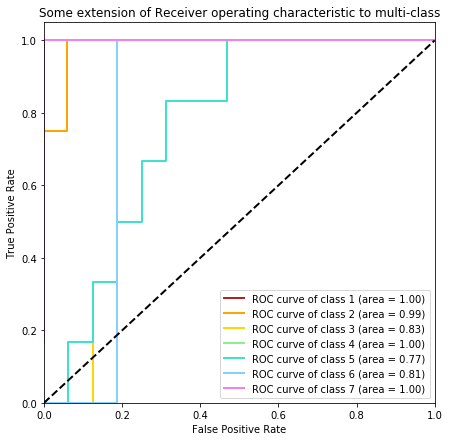

In [36]:
y_test_binary = label_binarize(y_test, classes=['bending1','bending2',
                                                'cycling','lying','sitting',
                                                'standing','walking'])
classifier = LogisticRegressionCV(cv=5, penalty='l1', solver='saga',
                                  multi_class='multinomial', n_jobs=2)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(7,7))
lw=2
colors = cycle(['firebrick','orange','gold','lightgreen',
                'turquoise','lightskyblue','violet'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### ii. Naive Bayes' classifier

#### Use Gaussian prior

In [37]:
for l in range(1,21):
    train_l = breakdf(l, train)
    test_l = breakdf(l, test)
    f_train_l = f_dataset(69*l, train_l)
    f_test_l = f_dataset(19*l, test_l)

    normalization = preprocessing.MinMaxScaler()
    f_train_l = pd.DataFrame(normalization.fit_transform(f_train_l))
    f_test_l = pd.DataFrame(normalization.fit_transform(f_test_l))

    X_train = f_train_l
    y_train = []
    for i in f_train_l.index:
        if i%69 in range(0,5):
            y_train.append('bending1')
        elif i%69 in range(5,9):
            y_train.append('bending2')
        elif i%69 in range(9,21):
            y_train.append('cycling')
        elif i%69 in range(21,33):
            y_train.append('lying')
        elif i%69 in range(33,45):
            y_train.append('sitting')
        elif i%69 in range(45,57):
            y_train.append('standing')
        else:
            y_train.append('walking')
    X_test = f_test_l
    y_test = []
    for i in f_test_l.index:
        if i%19 in range(0,2):
            y_test.append('bending1')
        elif i%19 in range(2,4):
            y_test.append('bending2')
        elif i%19 in range(4,7):
            y_test.append('cycling')
        elif i%19 in range(7,10):
            y_test.append('lying')
        elif i%19 in range(10,13):
            y_test.append('sitting')
        elif i%19 in range(13,16):
            y_test.append('standing')
        else:
            y_test.append('walking')
        
    clf = GaussianNB()
    cv_score = cross_val_score(clf, X_train, y_train, cv=4)
    print('When l =', l)
    print('the score is', max(cv_score))

When l = 1
the score is 0.9444444444444444
When l = 2
the score is 0.9142857142857143
When l = 3
the score is 0.8823529411764706
When l = 4
the score is 0.8985507246376812
When l = 5
the score is 0.872093023255814
When l = 6
the score is 0.8446601941747572
When l = 7
the score is 0.8842975206611571
When l = 8
the score is 0.8405797101449275
When l = 9
the score is 0.8451612903225807
When l = 10
the score is 0.7965116279069767
When l = 11
the score is 0.8052631578947368
When l = 12
the score is 0.8115942028985508
When l = 13
the score is 0.8080357142857143
When l = 14
the score is 0.8091286307053942
When l = 15
the score is 0.7992277992277992
When l = 16
the score is 0.7971014492753623
When l = 17
the score is 0.8088737201365188
When l = 18
the score is 0.7967741935483871
When l = 19
the score is 0.7987804878048781
When l = 20
the score is 0.8434782608695652


**The best value of $l$ is 1.**

In [38]:
l=1
train_l = breakdf(l, train)
test_l = breakdf(l, test)
f_train_l = f_dataset(69*l, train_l)
f_test_l = f_dataset(19*l, test_l)

normalization = preprocessing.MinMaxScaler()
f_train_l = pd.DataFrame(normalization.fit_transform(f_train_l))
f_test_l = pd.DataFrame(normalization.fit_transform(f_test_l))

X_train = f_train_l
y_train = []
for i in f_train_l.index:
    if i%69 in range(0,5):
        y_train.append('bending1')
    elif i%69 in range(5,9):
        y_train.append('bending2')
    elif i%69 in range(9,21):
        y_train.append('cycling')
    elif i%69 in range(21,33):
        y_train.append('lying')
    elif i%69 in range(33,45):
        y_train.append('sitting')
    elif i%69 in range(45,57):
        y_train.append('standing')
    else:
        y_train.append('walking')
X_test = f_test_l
y_test = []
for i in f_test_l.index:
    if i%19 in range(0,2):
        y_test.append('bending1')
    elif i%19 in range(2,4):
        y_test.append('bending2')
    elif i%19 in range(4,7):
        y_test.append('cycling')
    elif i%19 in range(7,10):
        y_test.append('lying')
    elif i%19 in range(10,13):
        y_test.append('sitting')
    elif i%19 in range(13,16):
        y_test.append('standing')
    else:
        y_test.append('walking')

**Confusion matrix (using Gaussian prior):**

**(Train set)**

In [40]:
clf = GaussianNB()
clf.fit(X_train, y_train)
C_train_G = confusion_matrix(y_train, clf.predict(X_train))
print('Confusion matrix of train set is\n',C_train_G)

Confusion matrix of train set is
 [[ 5  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  1  0  0 11  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 12]]


**(Test set)**

In [41]:
C_test_G = confusion_matrix(y_test, clf.predict(X_test))
print('Confusion matrix of test set is\n',C_test_G)

Confusion matrix of test set is
 [[2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 3 0 0]
 [0 0 3 0 0 0 0]]


**ROC and AUC (using Gaussian prior):**

**(Train set)**

ROC (train set)


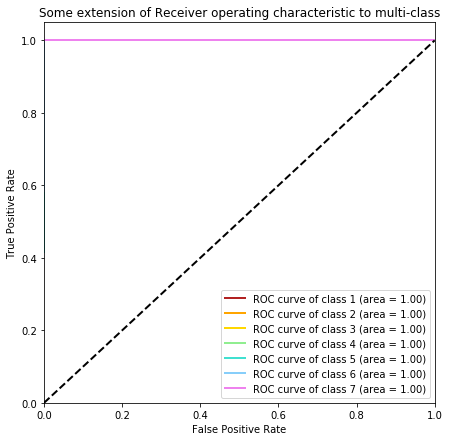

In [42]:
y_train_binary = label_binarize(y_train, classes=['bending1','bending2',
                                                  'cycling','lying','sitting',
                                                  'standing','walking'])
y_score = clf.fit(X_train, y_train).predict_proba(X_train)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_train_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(7,7))
lw=2
colors = cycle(['firebrick','orange','gold','lightgreen',
                'turquoise','lightskyblue','violet'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
print('ROC (train set)')
plt.show()

**(Test set)**

ROC (test set)


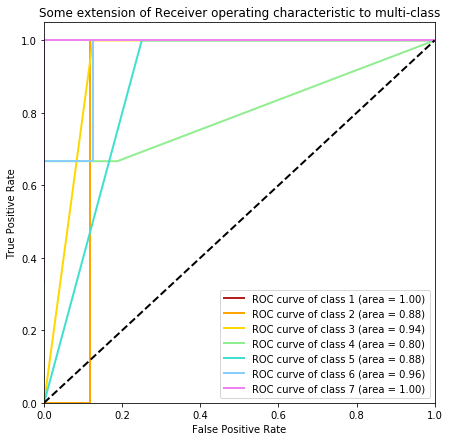

In [43]:
y_test_binary = label_binarize(y_test, classes=['bending1','bending2',
                                                'cycling','lying','sitting',
                                                'standing','walking'])
y_score = clf.fit(X_train, y_train).predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(7,7))
lw=2
colors = cycle(['firebrick','orange','gold','lightgreen',
                'turquoise','lightskyblue','violet'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
print('ROC (test set)')
plt.show()

#### Use Multinomial prior

In [45]:
for l in range(1,21):
    train_l = breakdf(l, train)
    test_l = breakdf(l, test)
    f_train_l = f_dataset(69*l, train_l)
    f_test_l = f_dataset(19*l, test_l)

    normalization = preprocessing.MinMaxScaler()
    f_train_l = pd.DataFrame(normalization.fit_transform(f_train_l))
    f_test_l = pd.DataFrame(normalization.fit_transform(f_test_l))

    X_train = f_train_l
    y_train = []
    for i in f_train_l.index:
        if i%69 in range(0,5):
            y_train.append('bending1')
        elif i%69 in range(5,9):
            y_train.append('bending2')
        elif i%69 in range(9,21):
            y_train.append('cycling')
        elif i%69 in range(21,33):
            y_train.append('lying')
        elif i%69 in range(33,45):
            y_train.append('sitting')
        elif i%69 in range(45,57):
            y_train.append('standing')
        else:
            y_train.append('walking')
    X_test = f_test_l
    y_test = []
    for i in f_test_l.index:
        if i%19 in range(0,2):
            y_test.append('bending1')
        elif i%19 in range(2,4):
            y_test.append('bending2')
        elif i%19 in range(4,7):
            y_test.append('cycling')
        elif i%19 in range(7,10):
            y_test.append('lying')
        elif i%19 in range(10,13):
            y_test.append('sitting')
        elif i%19 in range(13,16):
            y_test.append('standing')
        else:
            y_test.append('walking')
        
    clf = MultinomialNB()
    cv_score = cross_val_score(clf, X_train, y_train, cv=4)
    print('When l =', l)
    print('the score is', max(cv_score))

When l = 1
the score is 0.8235294117647058
When l = 2
the score is 0.7428571428571429
When l = 3
the score is 0.7692307692307693
When l = 4
the score is 0.7391304347826086
When l = 5
the score is 0.7241379310344828
When l = 6
the score is 0.7596153846153846
When l = 7
the score is 0.7603305785123967
When l = 8
the score is 0.7463768115942029
When l = 9
the score is 0.7371794871794872
When l = 10
the score is 0.7341040462427746
When l = 11
the score is 0.7263157894736842
When l = 12
the score is 0.7391304347826086
When l = 13
the score is 0.7232142857142857
When l = 14
the score is 0.7107438016528925
When l = 15
the score is 0.7335907335907336
When l = 16
the score is 0.7065217391304348
When l = 17
the score is 0.7244897959183674
When l = 18
the score is 0.7234726688102894
When l = 19
the score is 0.7225609756097561
When l = 20
the score is 0.7101449275362319


**The best value of $l$ is 1.**

In [46]:
l=1
train_l = breakdf(l, train)
test_l = breakdf(l, test)
f_train_l = f_dataset(69*l, train_l)
f_test_l = f_dataset(19*l, test_l)

normalization = preprocessing.MinMaxScaler()
f_train_l = pd.DataFrame(normalization.fit_transform(f_train_l))
f_test_l = pd.DataFrame(normalization.fit_transform(f_test_l))

X_train = f_train_l
y_train = []
for i in f_train_l.index:
    if i%69 in range(0,5):
        y_train.append('bending1')
    elif i%69 in range(5,9):
        y_train.append('bending2')
    elif i%69 in range(9,21):
        y_train.append('cycling')
    elif i%69 in range(21,33):
        y_train.append('lying')
    elif i%69 in range(33,45):
        y_train.append('sitting')
    elif i%69 in range(45,57):
        y_train.append('standing')
    else:
        y_train.append('walking')
X_test = f_test_l
y_test = []
for i in f_test_l.index:
    if i%19 in range(0,2):
        y_test.append('bending1')
    elif i%19 in range(2,4):
        y_test.append('bending2')
    elif i%19 in range(4,7):
        y_test.append('cycling')
    elif i%19 in range(7,10):
        y_test.append('lying')
    elif i%19 in range(10,13):
        y_test.append('sitting')
    elif i%19 in range(13,16):
        y_test.append('standing')
    else:
        y_test.append('walking')

**Confusion matrix (using Multinomial prior):**

**(Train set)**

In [47]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
C_train_M = confusion_matrix(y_train, clf.predict(X_train))
print('Confusion matrix of train set is\n',C_train_M)

Confusion matrix of train set is
 [[ 3  0  0  0  1  1  0]
 [ 0  1  0  0  3  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  2  7  0  3  0]
 [ 0  0  0  1  8  3  0]
 [ 0  0  0  0  2 10  0]
 [ 0  0  0  0  0  0 12]]


**(Test set)**

In [48]:
C_test_M = confusion_matrix(y_test, clf.predict(X_test))
print('Confusion matrix of test set is\n',C_test_M)

Confusion matrix of test set is
 [[2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]


**ROC and AUC (using Multinomial prior)**

**(Train set)**

ROC (train set)


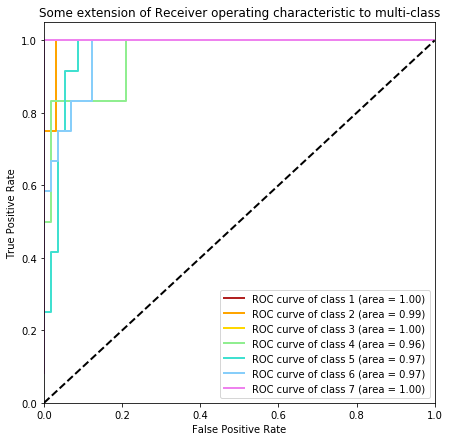

In [49]:
y_train_binary = label_binarize(y_train, classes=['bending1','bending2',
                                                  'cycling','lying','sitting',
                                                  'standing','walking'])
y_score = clf.fit(X_train, y_train).predict_proba(X_train)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_train_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(7,7))
lw=2
colors = cycle(['firebrick','orange','gold','lightgreen',
                'turquoise','lightskyblue','violet'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
print('ROC (train set)')
plt.show()

**(Test set)**

ROC (test set)


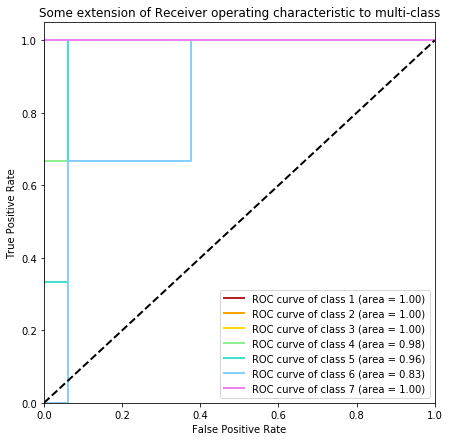

In [50]:
y_test_binary = label_binarize(y_test, classes=['bending1','bending2',
                                                'cycling','lying','sitting',
                                                'standing','walking'])
y_score = clf.fit(X_train, y_train).predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(7,7))
lw=2
colors = cycle(['firebrick','orange','gold','lightgreen',
                'turquoise','lightskyblue','violet'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
print('ROC (test set)')
plt.show()

### iii. Compare above method.

**I think the Naive Bayes' Classifier, using Gaussian prior, is the best because of higher score and good performance on confusion matirx, ROC and AUC.**